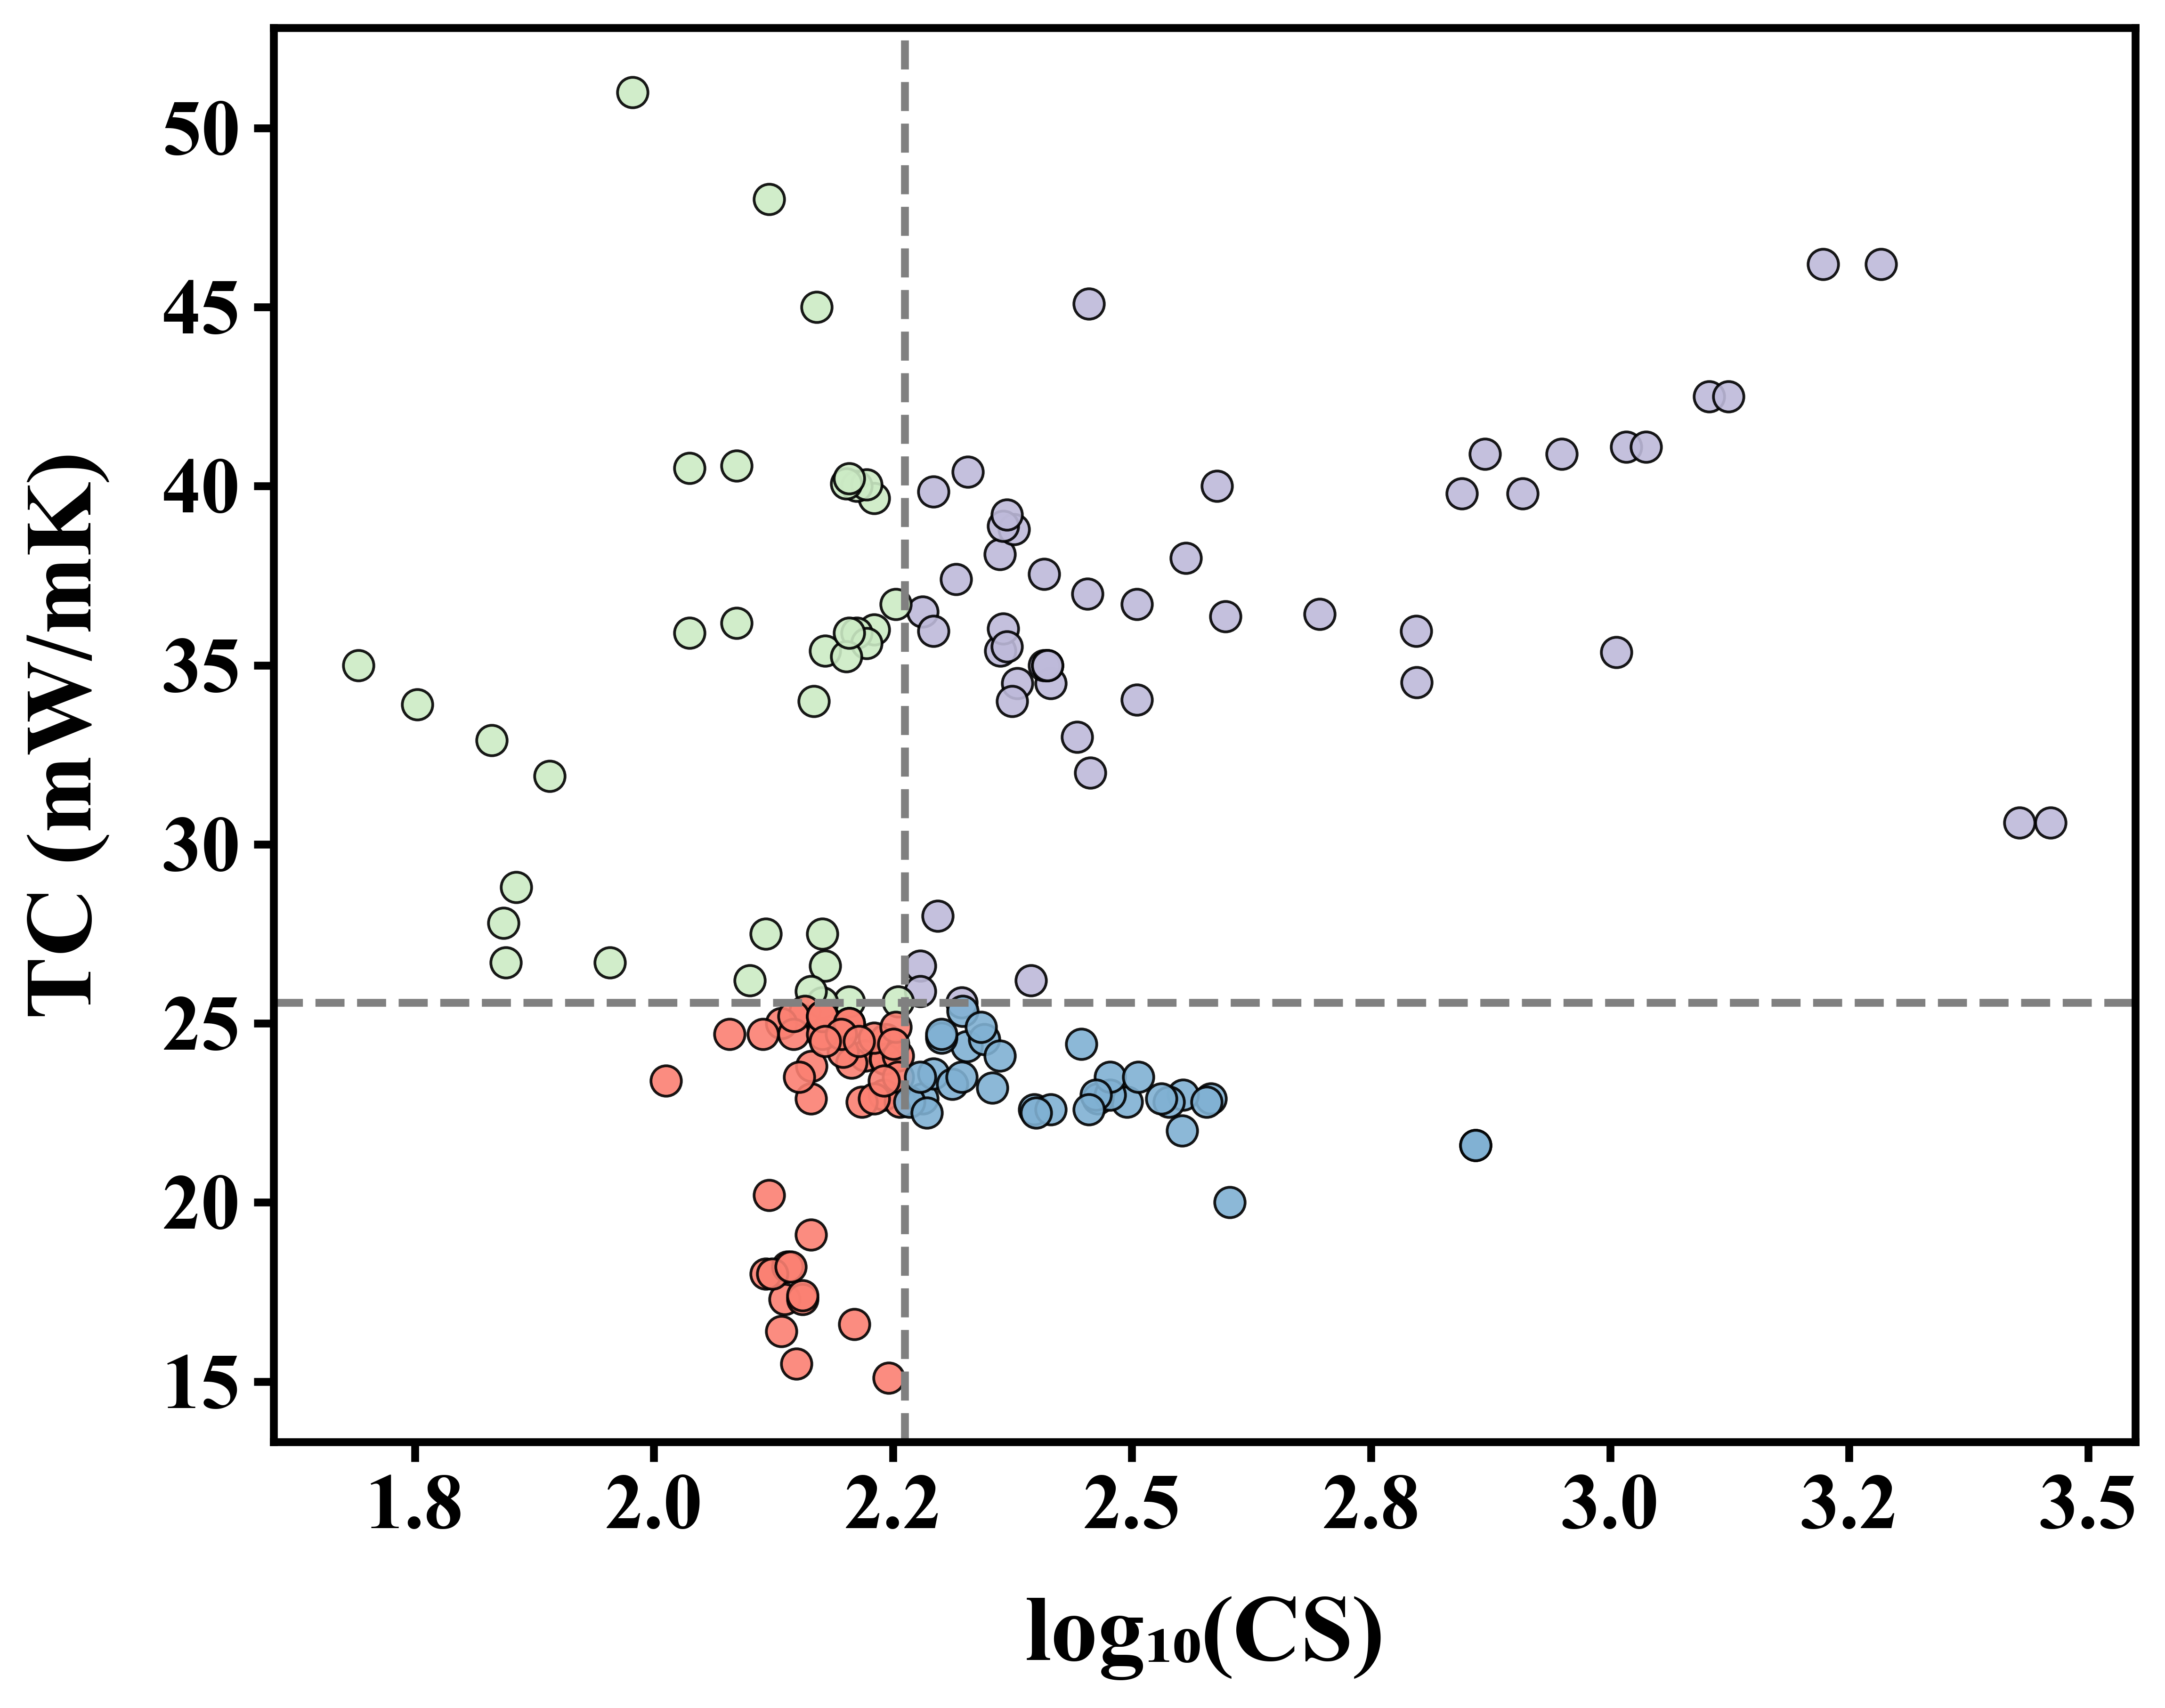

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ===== 读数据 =====
file_path = r"F:\codes\00-WORK\work-1\01-myself\01-predict\03-classification\EXCEL\CS-TC.xlsx"
df = pd.read_excel(file_path)
df = df.rename(columns={'CS': 'CS (KPa)', 'TC': 'TC (mW/mK)'})

# 转换 log_CS
df['log_CS'] = np.log10(df['CS (KPa)'])

# 计算中位数（CS 用原始值）
CS_50_raw = df['CS (KPa)'].quantile(0.5)
TC_50 = df['TC (mW/mK)'].quantile(0.5)

# 象限分类函数
def classify_quadrant(row):
    if row['CS (KPa)'] >= CS_50_raw and row['TC (mW/mK)'] >= TC_50:
        return 'Q1'
    elif row['CS (KPa)'] < CS_50_raw and row['TC (mW/mK)'] >= TC_50:
        return 'Q2'
    elif row['CS (KPa)'] < CS_50_raw and row['TC (mW/mK)'] < TC_50:
        return 'Q3'
    else:
        return 'Q4'

df['Quadrant'] = df.apply(classify_quadrant, axis=1)

# ===== 作图 =====
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5), dpi=600)

color_map = {'Q1': '#bebada', 'Q2': '#ccebc5', 'Q3': '#fb8072', 'Q4': '#80b1d3'}
symbol_map = {'Q1': 'Q1', 'Q2': 'Q2', 'Q3': 'Q3', 'Q4': 'Q4'}

ax.set_facecolor('white')  # 白底

# 绘制散点
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    sub = df[df['Quadrant'] == q]
    ax.scatter(sub['log_CS'], sub['TC (mW/mK)'],
               color=color_map[q], label=symbol_map[q],
               alpha=0.9, edgecolors='black', s=60,
               marker='o', linewidth=0.7)

# 中位数分割线
ax.axhline(TC_50, color='gray', linestyle='--', linewidth=2)
ax.axvline(np.log10(CS_50_raw), color='gray', linestyle='--', linewidth=2)

# 坐标轴标签
ax.set_xlabel('log₁₀(CS)', fontsize=24, fontname='Times New Roman', weight='bold', labelpad=13)
ax.set_ylabel('TC (mW/mK)', fontsize=24, fontname='Times New Roman', weight='bold', labelpad=13)

# X 轴格式
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))


# 坐标轴边框样式
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# 坐标轴刻度
ax.tick_params(axis='both', which='both',
               direction='out', length=5, width=2, color='black',
               bottom=True, top=False, left=True, right=False)

# 刻度标签样式
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_color('black')
    label.set_fontsize(20)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')

# 不显示网格
ax.grid(False)

plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_46068\3692783172.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


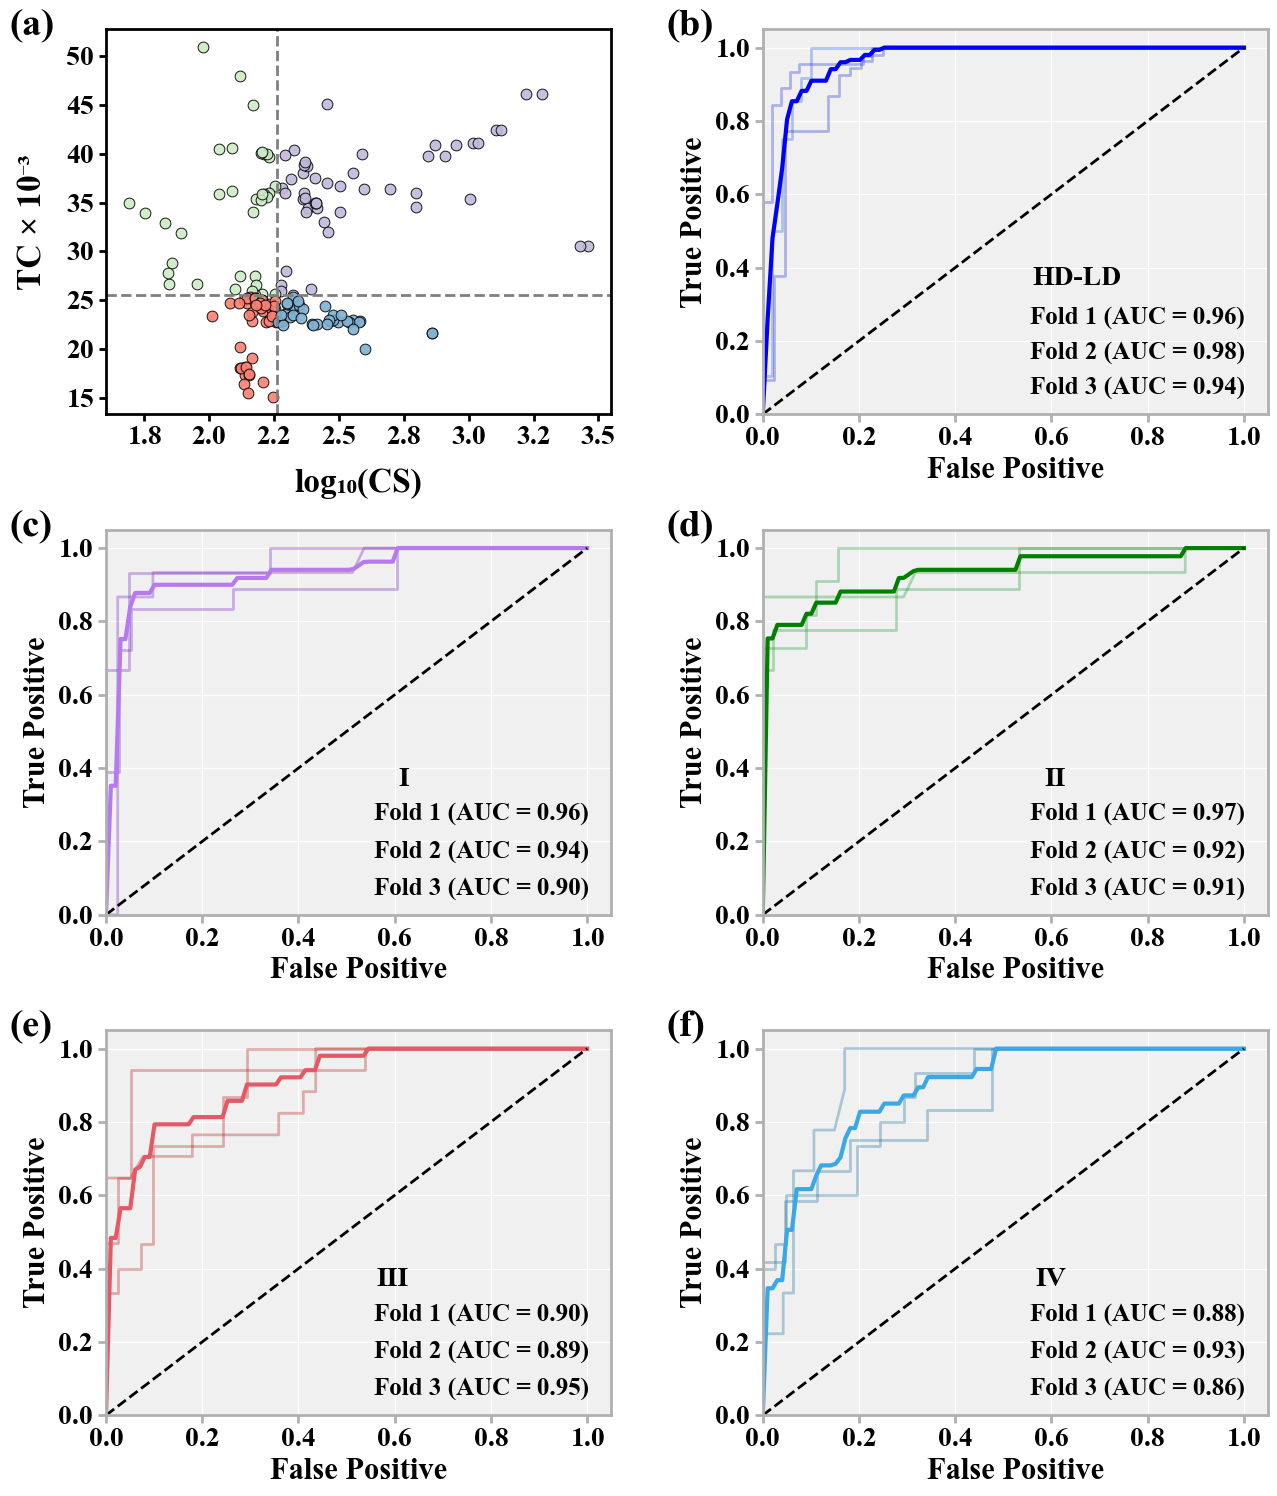

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from matplotlib.ticker import FuncFormatter

fig, axs = plt.subplots(3, 2, figsize=(14, 18), gridspec_kw={'wspace': 0.3, 'hspace': 0.3, 'left': 0.12, 'right': 0.95})
axs = axs.flatten()

file_path = r"F:\\codes\\00-WORK\\work-1\\01-myself\\01-predict\\03-classification\\EXCEL\\CS-TC.xlsx"
df = pd.read_excel(file_path)
df = df.rename(columns={'CS': 'CS (KPa)', 'TC': 'TC (mW/mK)'})
df['log_CS'] = np.log10(df['CS (KPa)'])

CS_50_raw = df['CS (KPa)'].quantile(0.5)
TC_50 = df['TC (mW/mK)'].quantile(0.5)

def classify_quadrant(row):
    if row['CS (KPa)'] >= CS_50_raw and row['TC (mW/mK)'] >= TC_50:
        return 'Q1'
    elif row['CS (KPa)'] < CS_50_raw and row['TC (mW/mK)'] >= TC_50:
        return 'Q2'
    elif row['CS (KPa)'] < CS_50_raw and row['TC (mW/mK)'] < TC_50:
        return 'Q3'
    else:
        return 'Q4'

df['Quadrant'] = df.apply(classify_quadrant, axis=1)

color_map = {'Q1': '#bebada', 'Q2': '#ccebc5', 'Q3': '#fb8072', 'Q4': '#80b1d3'}
symbol_map = {'Q1': 'Q1', 'Q2': 'Q2', 'Q3': 'Q3', 'Q4': 'Q4'}

ax = axs[0]
ax.set_facecolor('white')
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    sub = df[df['Quadrant'] == q]
    ax.scatter(sub['log_CS'], sub['TC (mW/mK)'], color=color_map[q], label=symbol_map[q],
               alpha=0.9, edgecolor='black', s=60, marker='o', linewidth=0.7)

ax.axhline(TC_50, color='gray', linestyle='--', linewidth=2)
ax.axvline(np.log10(CS_50_raw), color='gray', linestyle='--', linewidth=2)

ax.set_xlabel('log₁₀(CS)', fontsize=24, fontname='Times New Roman', weight='bold', labelpad=13)
ax.set_ylabel('TC × 10⁻³', fontsize=24, fontname='Times New Roman', weight='bold', labelpad=13)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))
ax.text(-0.19, 1.05, '(a)', transform=ax.transAxes, fontsize=28, fontweight='bold', fontname='Times New Roman', verticalalignment='top', horizontalalignment='left')

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
ax.tick_params(axis='both', which='both', direction='out', length=5, width=2, color='black', bottom=True, top=False, left=True, right=False)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_color('black')
    label.set_fontsize(20)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')
ax.grid(False)

def set_bmh_style(ax):
    ax.set_facecolor('#F0F0F0')
    ax.grid(True, color='white', linestyle='-', linewidth=1)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#B0B0B0')
        ax.spines[spine].set_linewidth(2)
    ax.tick_params(axis='both', which='both', direction='out', length=6, width=2, color='#B0B0B0')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(20)
        label.set_fontweight('bold')
        label.set_fontname('Times New Roman')

ax = axs[1]
set_bmh_style(ax)
roc_ad_folds = pd.read_excel("ROC_AD.xlsx", sheet_name="ROC_Folds")
roc_ad_mean = pd.read_excel("ROC_AD.xlsx", sheet_name="ROC_Mean")
fold_colors = ["#184FE4", "#0F1DE0", "#0723C5"]  # 浅蓝 - 中蓝 - 深蓝
for idx, fold_num in enumerate(roc_ad_folds['Fold'].unique()):
    fold_data = roc_ad_folds[roc_ad_folds['Fold'] == fold_num]
    auc_val = auc(fold_data['FPR'], fold_data['TPR'])
    color = fold_colors[idx % len(fold_colors)]
    ax.plot(fold_data['FPR'], fold_data['TPR'], lw=2, alpha=0.3, color=color, label=f'Fold {int(fold_num)} (AUC = {auc_val:.2f})')
ax.plot(roc_ad_mean['FPR'], roc_ad_mean['TPR'], color='blue', lw=3)
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlabel('False Positive', fontsize=22, fontweight='bold', fontname='Times New Roman')
ax.set_ylabel('True Positive', fontsize=22, fontweight='bold', fontname='Times New Roman')
ax.set_xlim([0, 1.05])
ax.set_ylim([0, 1.05])
ax.legend(loc='lower right', bbox_to_anchor=(1.0, -0.02), frameon=False, handlelength=0, prop={'size': 18, 'weight': 'bold', 'family': 'Times New Roman'})
ax.text(-0.19, 1.05, '(b)', transform=ax.transAxes, fontsize=28, fontweight='bold', fontname='Times New Roman', verticalalignment='top', horizontalalignment='left')
ax.text(0.71, 0.32, 'HD-LD', transform=ax.transAxes, fontsize=20, fontweight='bold', fontname='Times New Roman', verticalalignment='bottom', horizontalalignment='right')

filename = 'ROC_四个象限.xlsx'
quadrants = ['++', '-+', '--', '+-']
labels = ['(c)', '(d)', '(e)', '(f)']
corner_labels = ['I', 'II', 'III', 'IV']
mean_colors = ["#B679F0", 'green', "#E45965", "#3AA7E6"]
fold_color_shades = [
    ["#6C0EBE", "#6C0EBE", "#6C0EBE"],  # 紫色浅中深
    ["#0A9129", "#0A9129", "#0A9129"],  # 绿色浅中深
    ["#B30808", "#B30808", "#B30808"],  # 红色浅中深
    ["#066294", "#066294", "#066294"]   # 蓝色浅中深
]

for i, q in enumerate(quadrants):
    ax = axs[i + 2]
    set_bmh_style(ax)
    df_folds = pd.read_excel(filename, sheet_name=f'ROC_Folds_{q}')
    df_mean = pd.read_excel(filename, sheet_name=f'ROC_Mean_{q}')
    shade_colors = fold_color_shades[i]
    for idx, fold_num in enumerate(df_folds['Fold'].unique()):
        df_fold = df_folds[df_folds['Fold'] == fold_num]
        auc_val = auc(df_fold['FPR'], df_fold['TPR'])
        color = shade_colors[idx % len(shade_colors)]
        ax.plot(df_fold['FPR'], df_fold['TPR'], lw=2, alpha=0.3, color=color, label=f'Fold {int(fold_num)} (AUC = {auc_val:.2f})')
    ax.plot(df_mean['FPR'], df_mean['TPR'], color=mean_colors[i], lw=3)
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlabel('False Positive', fontsize=22, fontweight='bold', fontname='Times New Roman')
    ax.set_ylabel('True Positive', fontsize=22, fontweight='bold', fontname='Times New Roman')
    ax.set_xlim([0, 1.05])
    ax.set_ylim([0, 1.05])
    ax.text(-0.19, 1.05, labels[i], transform=ax.transAxes, fontsize=28, fontweight='bold', fontname='Times New Roman', verticalalignment='top', horizontalalignment='left')
    ax.text(0.6, 0.32, corner_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', fontname='Times New Roman', verticalalignment='bottom', horizontalalignment='right')
    ax.legend(loc='lower right', bbox_to_anchor=(1.0, -0.02), frameon=False, handlelength=0, handleheight=1, prop={'size': 18, 'weight': 'bold', 'family': 'Times New Roman'})

plt.tight_layout()
plt.savefig(r'F:\\codes\\00-WORK\\work-1\\01-myself\\01-predict\\03-classification\\classification-figure\\ROC_Quadrants.png', dpi=600, bbox_inches='tight')
plt.show()